In [ ]:
!pip install tensorflow-addons

In [ ]:
!pip install tensorflow-addons


In [ ]:
from tensorflow.keras.layers import Bidirectional, Dense, Dropout, LSTM
import rnn_model
import stocks

In [ ]:
# Reading & Preprocessing data.
train_data, test_data = stocks.read_data(preprocessing=True, scaling_method='MinMax')

In [ ]:
# Creating time frames.
x_train, y_train = stocks.construct_time_frames(train_data, frame_size=64)
x_test, y_test = stocks.construct_time_frames(test_data, frame_size=64)

In [ ]:
# Defining layers of LSTM.
input_shape=x_train.shape[1:]
layers = [
    Bidirectional(LSTM(units=50, return_sequences=True)),
    LayerNormalization(),
    Dropout(0.2),
    Bidirectional(LSTM(units=50, return_sequences=True)),
    LayerNormalization(),
    Dropout(0.2),
    Bidirectional(LSTM(units=50)),
    LayerNormalization(),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
]
name = 'blstm'
epochs = 200
batch_size = 32

In [ ]:
# Training the model.
model = rnn_model.build_model(input_shape, layers)
model, history = rnn_model.train(model, name, x_train, y_train, epochs=epochs, batch_size=batch_size)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirecti  (None, 64, 100)           22400     
 onal)                                                           
                                                                 
 layer_normalization_6 (Lay  (None, 64, 100)           200       
 erNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 64, 100)           0         
                                                                 
 bidirectional_7 (Bidirecti  (None, 64, 100)           60400     
 onal)                                                           
                                                                 
 layer_normalization_7 (Lay  (None, 64, 100)           200       
 erNormalization)                                     

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - ETA: 0s - loss: 0.0284
Epoch 2: loss improved from 0.03413 to 0.02837, saving model to weights/blstm_callback.h5
14/14 [==============================] - 3s 186ms/step - loss: 0.0284
Epoch 3/200
14/14 [==============================] - ETA: 0s - loss: 0.0200
Epoch 3: loss improved from 0.02837 to 0.02002, saving model to weights/blstm_callback.h5
14/14 [==============================] - 3s 235ms/step - loss: 0.0200
Epoch 4/200
14/14 [==============================] - ETA: 0s - loss: 0.0205
Epoch 4: loss did not improve from 0.02002
14/14 [==============================] - 3s 221ms/step - loss: 0.0205
Epoch 5/200
14/14 [==============================] - ETA: 0s - loss: 0.0185
Epoch 5: loss improved from 0.02002 to 0.01851, saving model to weights/blstm_callback.h5
14/14 [==============================] - 3s 186ms/step - loss: 0.0185
Epoch 6/200
14/14 [==============================] - ETA: 0s - loss: 0.0184
Epoch 6: loss improved from 0.01851 to 

In [ ]:
# Training the model.
model = rnn_model.build_model(input_shape, layers)
model, history = rnn_model.train(model, name, x_train, y_train, epochs=epochs, batch_size=batch_size)

In [ ]:
# Making predictions.
y_predict = model.predict(x_test)

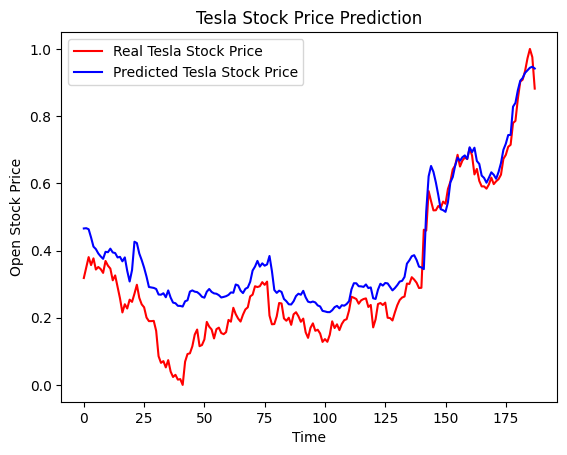

In [ ]:
# Visualising the prediction.
stocks.plot_prediction(y_test, y_predict, 'Real Tesla Stock Price', 'Predicted Tesla Stock Price')